In [12]:
#classification : LOGISTIC REGRESSION

In [1]:
import pandas as pd
import numpy as np
import math
import copy
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [3]:
df=pd.read_csv(r'C:\Users\LENOVO\Desktop/Daiyan/Coding/databases and other tools/mushrooms.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# applying label encoder to whole dataset...
df = df.apply(label_encoder.fit_transform)

# checking the result
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [6]:
y = df["class"].values   # our labels.. okay to eat or poison.
df.drop(["veil-color"],axis=1)
df.drop(["veil-type"],axis=1,inplace=True)

df.drop(["class"],axis=1,inplace=True)  # dropping the lables from the data

x = df.values  # our features..

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)

In [8]:
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

In [9]:
def compute_gradient(x_train,y_train,w,b):
    m,n = x_train.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(x_train[i],w) + b)
        err_i  = f_wb_i  - y_train[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * x_train[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
        
    return dj_db, dj_dw

In [10]:
def gradient_descent(x_train,y_train,w_in,b_in,a,num_iters):
    w = copy.deepcopy(w_in)  
    b = b_in
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient(x_train, y_train, w, b)
        w = w - np.dot(a,dj_dw)               
        b = b - np.dot(a,dj_db)
        if i%100==0:
            print(f'iteration: {i}, w={w}, b={b}')
    return w,b
    

In [11]:
def predict(x,w,b):
    z = np.dot(x,w) + b
    g = sigmoid(z)
    y_pred = np.zeros(z.shape[0])
    print(z.shape)
    
    for i in range(z.shape[0]):
        if z[i] <= 0.5:
            y_pred[i] = 0;
        else:
            y_pred[i] = 1;
            
    
    return y_pred

In [20]:
m,n = x_train.shape
w = np.zeros((n,))
a = 0.00000001
b = 0
num_iters = 5000
w,b = gradient_descent(x_train,y_train,w,b,a,num_iters)
print(f'done, w = {w}, b = {b}')


iteration: 0, w=[-5.44783010e-10  6.60203139e-10 -1.22345337e-09 -1.36811327e-09
 -2.14835334e-09 -1.61588181e-10 -6.49430594e-10  1.18497999e-09
 -1.07633118e-08 -3.93967375e-10 -2.24222838e-09 -1.45583256e-09
 -1.46814404e-09 -2.80855648e-09 -2.97322253e-09 -3.46260388e-10
 -5.89412127e-10 -4.38904278e-09  1.19421360e-09  8.51031086e-10
  1.43736534e-09], b=-2.693136349646045e-10
iteration: 100, w=[-5.50183966e-08  6.66828958e-08 -1.23562335e-07 -1.38178669e-07
 -2.16977969e-07 -1.63190607e-08 -6.55922292e-08  1.19683269e-07
 -1.08708573e-06 -3.97899363e-08 -2.26463283e-07 -1.47036770e-07
 -1.48280174e-07 -2.83655968e-07 -3.00287313e-07 -3.49695765e-08
 -5.95291237e-08 -4.43289346e-07  1.20620001e-07  8.59591455e-08
  1.45175728e-07], b=-2.7199285338142543e-08
iteration: 200, w=[-1.09482728e-07  1.32710299e-07 -2.45888434e-07 -2.74987697e-07
 -4.31796263e-07 -3.24738687e-08 -1.30534511e-07  2.38182131e-07
 -2.16339081e-06 -7.91843834e-08 -4.50680805e-07 -2.92613115e-07
 -2.95087503e-

(3249, 21)
[5 5 5 ... 2 3 3]
(3249,)
[0.49985666 0.4999101  0.4997908  ... 0.49977286 0.49996138 0.49988587]
[0. 0. 0. ... 0. 0. 0.]


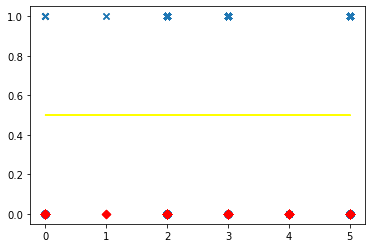

In [21]:
print(x_train.shape)
print(x_train[:,0])

plt.scatter(x_train[:,0],y_train,marker='x')
z = sigmoid(np.dot(x_train,w)+b)
plt.plot(x_train[:,0],z, color='yellow')
g = predict(x_train,w,b)
print(z)
print(g)

plt.scatter(x_train[:,0],g,marker='D', color= 'red')

(4875, 21)
[2 2 5 ... 3 0 5]
(4875,)
[0.49988227 0.49994237 0.49995252 ... 0.49994083 0.49987305 0.49983879]
[0. 0. 0. ... 0. 0. 0.]


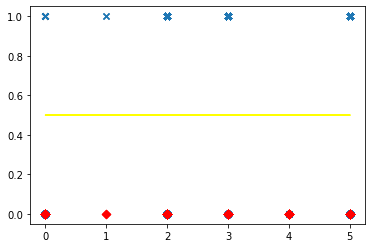

In [22]:
print(x_test.shape)
print(x_test[:,0])

plt.scatter(x_test[:,0],y_test,marker='x')
z = sigmoid(np.dot(x_test,w)+b)
plt.plot(x_test[:,0],z, color='yellow')
g = predict(x_test,w,b)
print(z)
print(g)

plt.scatter(x_test[:,0],g,marker='D', color= 'red')